## 1- Cargamos los datos

In [269]:
import mlflow.sklearn

In [270]:
mlflow.set_experiment(experiment_name = "proyecto_final")

<Experiment: artifact_location=('/home/alumni/Programación/Bootcamp Data Science y '
 'MLops/Material/ProyectoFinal/FinalProject/src/notebooks/../../deployment/mlruns/466034536605459027'), creation_time=1729798666722, experiment_id='466034536605459027', last_update_time=1729798666722, lifecycle_stage='active', name='proyecto_final', tags={}>

In [271]:
mlflow.set_tracking_uri("../../deployment/mlruns/")

In [272]:
import pandas as pd

data = pd.read_csv("../datasets/processed_data/ohe_customer_dataset.csv", sep = ",")
data

,fraudulent,transactionFailed,paymentMethodRegistrationFailure_False,paymentMethodRegistrationFailure_True,paymentMethodType_apple pay,paymentMethodType_bitcoin,paymentMethodType_card,paymentMethodType_paypal,paymentMethodProvider_American Express,paymentMethodProvider_Diners Club / Carte Blanche,...,emailProvider_gmail,emailProvider_hotmail,emailProvider_other,emailProvider_weird,emailProvider_yahoo,customerIPAddressSimplified_digits_and_letters,customerIPAddressSimplified_only_numeric_digits,sameCity_no,sameCity_unknown,sameCity_yes
0,0,False,False,True,False,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,True
1,1,False,False,True,False,True,False,False,False,False,...,False,False,False,False,True,False,True,True,False,False
2,0,False,True,False,False,False,True,False,False,False,...,False,False,False,False,True,True,False,True,False,False
3,0,False,True,False,False,False,True,False,False,True,...,False,False,False,False,True,True,False,True,False,False
4,1,True,True,False,False,False,True,False,False,False,...,False,False,True,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,2,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
619,2,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
620,2,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
621,2,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False


In [273]:
from funpymodeling.exploratory import status

status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,fraudulent,0,0.0,107,0.171750,3,int64
1,transactionFailed,0,0.0,455,0.730337,2,bool
2,paymentMethodRegistrationFailure_False,0,0.0,321,0.515249,2,bool
3,paymentMethodRegistrationFailure_True,0,0.0,583,0.935795,2,bool
4,paymentMethodType_apple pay,0,0.0,587,0.942215,2,bool
5,paymentMethodType_bitcoin,0,0.0,595,0.955056,2,bool
6,paymentMethodType_card,0,0.0,381,0.611557,2,bool
7,paymentMethodType_paypal,0,0.0,587,0.942215,2,bool
8,paymentMethodProvider_American Express,0,0.0,601,0.964687,2,bool
9,paymentMethodProvider_Diners Club / Carte Blanche,0,0.0,589,0.945425,2,bool


## 2- Clasificación

### 2.1- Separación de X de Y, y luego TR de TS

In [274]:
x_data = data.drop("fraudulent", axis = 1)
y_data = data["fraudulent"]

In [275]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.3

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = TEST_SIZE)

### 2.2- Creación del modelo

In [276]:
from sklearn.ensemble import RandomForestClassifier

N_ESTIMATORS = 500
RANDOM_STATE = 99

rf_model = RandomForestClassifier(n_estimators = N_ESTIMATORS, random_state = RANDOM_STATE)

In [277]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=99)

### 2.3- Métricas

In [278]:
from sklearn.metrics import accuracy_score

In [279]:
pred_ts = rf_model.predict(x_test)
pred_tr = rf_model.predict(x_train)

In [280]:
pred_ts

array([0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2,
       0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0,
       2, 2, 0, 2, 1, 2, 2, 2, 0, 0, 2])

In [281]:
pred_tr

array([2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 0, 0, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 0, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2,

In [282]:
df_val_ts = pd.DataFrame({"y_test":y_test,"pred_ts":pred_ts})
df_val_tr = pd.DataFrame({"y_train":y_train,"pred_tr":pred_tr})

In [283]:
df_val_tr

,y_train,pred_tr
377,2,2
513,2,2
65,1,1
382,2,2
99,1,1
...,...,...
173,2,2
195,2,2
212,2,2
59,0,0


In [284]:
accuracy_train = accuracy_score(df_val_tr.y_train, df_val_tr.pred_tr, normalize = True)
accuracy_test = accuracy_score(df_val_ts.y_test, df_val_ts.pred_ts, normalize = True)

In [285]:
accuracy_test

0.8983957219251337

### 2.4- Matriz de confusión

In [286]:
from sklearn.metrics import ConfusionMatrixDisplay

In [287]:
import seaborn as sns

In [288]:
import matplotlib.pyplot as plt

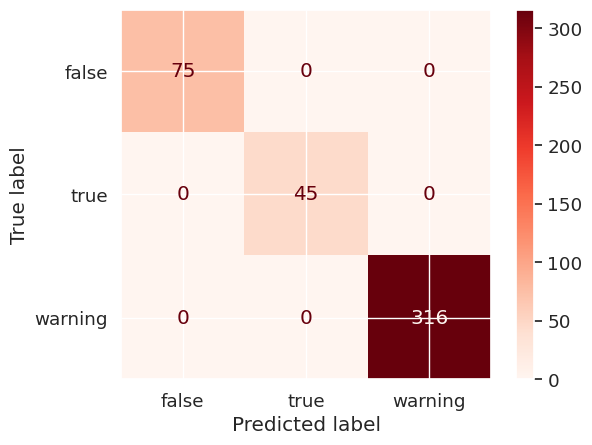

In [289]:
sns.set_theme(font_scale = 1.2)

ConfusionMatrixDisplay.from_estimator(rf_model,
                                      x_train,
                                      y_train,
                                      display_labels = ["false","true","warning"],
                                      cmap = "Reds")

## 3- Guardar modelo

In [290]:
import pickle

with open("../model/modelo_proyecto_final.pkl", "wb") as handle:
    pickle.dump(rf_model, handle, protocol = pickle.HIGHEST_PROTOCOL)

## 4- Guardar parámetros, métrica y modelo en MLflow 

### 4.1- Guardar parámetros

In [291]:
mlflow.log_param("Percentage of test size", TEST_SIZE)
mlflow.log_param("Number of estimators", N_ESTIMATORS)
mlflow.log_param("Random state", RANDOM_STATE)

99

### 4.2- Guardar métrica

In [292]:
mlflow.log_metric("Train Accuracy", accuracy_train)
mlflow.log_metric("Test Accuracy", accuracy_test)

### 4.3- Guardar modelo

In [293]:
mlflow.sklearn.log_model(rf_model, "My_model")

2024/10/24 16:38:23 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
